## Observations and Insights 

In [1]:
 #%matplotlib notebook

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import sem
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mice_tumor_all_df= pd.merge(mouse_metadata,study_results, how= 'outer', on= 'Mouse ID' )
# Display the data table for preview
mice_tumor_all_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [3]:
mice_tumor_all_df.columns

Index(['Mouse ID', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)',
       'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites'],
      dtype='object')

In [4]:
for x in range(len(mice_tumor_all_df)):
    mice_tumor_all_df.loc[x,'ID Time']= str(mice_tumor_all_df.loc[x, "Mouse ID"]) + str(mice_tumor_all_df.loc[x,'Timepoint'])
mice_tumor_all_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,ID Time
0,k403,Ramicane,Male,21,16,0,45.000000,0,k4030
1,k403,Ramicane,Male,21,16,5,38.825898,0,k4035
2,k403,Ramicane,Male,21,16,10,35.014271,1,k40310
3,k403,Ramicane,Male,21,16,15,34.223992,1,k40315
4,k403,Ramicane,Male,21,16,20,32.997729,1,k40320
...,...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2,z96925
1889,z969,Naftisol,Male,9,30,30,65.841013,3,z96930
1890,z969,Naftisol,Male,9,30,35,69.176246,4,z96935
1891,z969,Naftisol,Male,9,30,40,70.314904,4,z96940


In [5]:
for x in range(len(mice_tumor_all_df)):
    if x != 0:
        if mice_tumor_all_df.loc[x-1, "ID Time"] ==  mice_tumor_all_df.loc[x,'ID Time']:
            mice_tumor_all_df.loc[x, "Duplicate"]= 'True'
            start = mice_tumor_all_df.loc[x,'ID Time']
        else:
            mice_tumor_all_df.loc[x, "Duplicate"]= 'False'
mice_tumor_all_df.loc[0,'Duplicate'] = 'False'            
mice_tumor_all_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,ID Time,Duplicate
0,k403,Ramicane,Male,21,16,0,45.000000,0,k4030,False
1,k403,Ramicane,Male,21,16,5,38.825898,0,k4035,False
2,k403,Ramicane,Male,21,16,10,35.014271,1,k40310,False
3,k403,Ramicane,Male,21,16,15,34.223992,1,k40315,False
4,k403,Ramicane,Male,21,16,20,32.997729,1,k40320,False
...,...,...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2,z96925,False
1889,z969,Naftisol,Male,9,30,30,65.841013,3,z96930,False
1890,z969,Naftisol,Male,9,30,35,69.176246,4,z96935,False
1891,z969,Naftisol,Male,9,30,40,70.314904,4,z96940,False


In [6]:
#mice_tumor_all_df.groupby['Duplicate'].count()
mice_tumor_all_df.groupby('Duplicate').count()[['Mouse ID']]

,Mouse ID
Duplicate,
False,1888
True,5


In [7]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_data=pd.DataFrame(mice_tumor_all_df[mice_tumor_all_df.Duplicate == 'True'])
duplicate_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,ID Time,Duplicate
909,g989,Propriva,Female,21,26,0,45.000000,0,g9890,True
911,g989,Propriva,Female,21,26,5,47.570392,0,g9895,True
913,g989,Propriva,Female,21,26,10,49.880528,0,g98910,True
915,g989,Propriva,Female,21,26,15,53.442020,0,g98915,True
917,g989,Propriva,Female,21,26,20,54.657650,1,g98920,True


In [8]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mice_df=pd.DataFrame(mice_tumor_all_df[mice_tumor_all_df.Duplicate == 'False'])
clean_mice_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,ID Time,Duplicate
0,k403,Ramicane,Male,21,16,0,45.000000,0,k4030,False
1,k403,Ramicane,Male,21,16,5,38.825898,0,k4035,False
2,k403,Ramicane,Male,21,16,10,35.014271,1,k40310,False
3,k403,Ramicane,Male,21,16,15,34.223992,1,k40315,False
4,k403,Ramicane,Male,21,16,20,32.997729,1,k40320,False
...,...,...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2,z96925,False
1889,z969,Naftisol,Male,9,30,30,65.841013,3,z96930,False
1890,z969,Naftisol,Male,9,30,35,69.176246,4,z96935,False
1891,z969,Naftisol,Male,9,30,40,70.314904,4,z96940,False


In [9]:
# Checking the number of mice in the clean DataFrame.
mice_count = len(clean_mice_df["Mouse ID"].unique())
mice_count

249

## Summary Statistics

In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.



In [11]:
drug_names = clean_mice_df["Drug Regimen"].unique()
drug_names

array(['Ramicane', 'Capomulin', 'Infubinol', 'Placebo', 'Ceftamin',
       'Stelasyn', 'Zoniferol', 'Ketapril', 'Propriva', 'Naftisol'],
      dtype=object)

In [12]:
tumor_size_data_df = pd.DataFrame([[0],
                                      [0],
                                      [0],
                                      [0],
                                      [0]],
                                  index= ['Mean', 'Median', 'Variance', 'St Dev', 'SEM'],
                                  columns=[]) 
tumor_size_data_df

""
Mean
Median
Variance
St Dev
SEM


In [13]:
 #mean, median, variance, standard deviation, and SEM of the tumor volume. 

#This DF is for ALL data


for x in drug_names:
    tumor_size_array = pd.DataFrame(clean_mice_df[mice_tumor_all_df['Drug Regimen'] == x])
    tumorsize= tumor_size_array["Tumor Volume (mm3)"]
    
    mean_tumor = round(np.mean(tumorsize),2)
    median_tumor = round(np.median(tumorsize),2)
    var_tumor = round(np.var(tumorsize),2)
    st_tumor = round(np.std(tumorsize),2)
    sem_tumor = round(sem(tumorsize),2)
    
    tumor_size_data_df[x] = pd.DataFrame([[mean_tumor],
                                          [median_tumor],
                                          [var_tumor],
                                          [st_tumor],
                                          [sem_tumor]],
                                        index= ['Mean', 'Median', 'Variance', 'St Dev', 'SEM'],
                                        columns=[x])

#used to test my calculations    
#print(f"The mean temperature at the LAX airport is {sem_tumor}")
tumor_size_data_df

<ipython-input-13-3abbfbfb0859>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tumor_size_array = pd.DataFrame(clean_mice_df[mice_tumor_all_df['Drug Regimen'] == x])


,Ramicane,Capomulin,Infubinol,Placebo,Ceftamin,Stelasyn,Zoniferol,Ketapril,Propriva,Naftisol
Mean,40.22,40.68,52.88,54.03,52.59,54.23,53.24,55.24,52.39,54.33
Median,40.67,41.56,51.82,52.29,51.78,52.43,51.82,53.70,50.91,52.51
Variance,23.38,24.84,42.89,60.83,39.07,59.12,48.27,68.19,42.86,65.82
St Dev,4.84,4.98,6.55,7.80,6.25,7.69,6.95,8.26,6.55,8.11
SEM,0.32,0.33,0.49,0.58,0.47,0.57,0.52,0.60,0.53,0.60


In [14]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line


In [15]:
tumor_size_data_df.columns

Index(['Ramicane', 'Capomulin', 'Infubinol', 'Placebo', 'Ceftamin', 'Stelasyn',
       'Zoniferol', 'Ketapril', 'Propriva', 'Naftisol'],
      dtype='object')

In [16]:
#tumor_size_data_df = tumor_size_data_df[['Capomulin','Ceftamin','Infubinol','Ketapril','Naftisol','Placebo','Propriva','Ramicane','Stelasyn','Zoniferol']]
#tumor_size_data_df

In [17]:
clean_mice_df.groupby('Drug Regimen').agg({"Tumor Volume (mm3)" : ['mean', 'median', 'var', 'std', 'sem', 'max', 'min']})

Tumor Volume (mm3)                                            \
                           mean     median        var       std       sem   
Drug Regimen                                                                
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346   
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821   
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236   
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860   
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466   
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331   
Propriva              52.393463  50.909965  43.138803  6.568014  0.525862   
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955   
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111   
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398   

                                    
                    max        min  
Drug Regimen                        
Capomulin     48.158209  23.343598  
Ceftamin      68.923185  45.000000  
Infubinol     72.226731  36.321346  
Ketapril      78.567014  45.000000  
Naftisol      76.668817  45.000000  
Placebo       73.212939  45.000000  
Propriva      72.455421  45.000000  
Ramicane      47.622816  22.050126  
Stelasyn      75.123690  45.000000  
Zoniferol     73.324432  45.000000

## Bar and Pie Charts

In [18]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
x_axis = np.arange(len(drug_names))
x_axis


array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [19]:
drug_count = pd.DataFrame(clean_mice_df.groupby('Drug Regimen').count()['Mouse ID'])
drug_count

,Mouse ID
Drug Regimen,
Capomulin,230
Ceftamin,178
Infubinol,178
Ketapril,188
Naftisol,186
Placebo,181
Propriva,156
Ramicane,228
Stelasyn,181


In [20]:
#mice_ID_list = mice_tumor_all_df["Mouse ID"]

count_list = drug_count["Mouse ID"].values
count_list

array([230, 178, 178, 188, 186, 181, 156, 228, 181, 182])

In [21]:
drug_list=drug_count.index.values
drug_list

array(['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol',
       'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'],
      dtype=object)

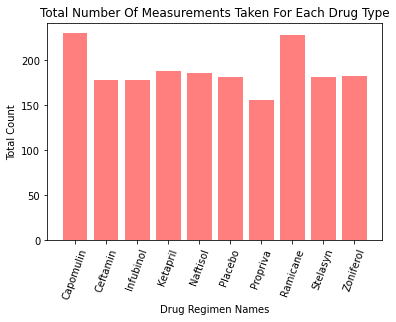

In [22]:
plt.bar(x_axis, count_list, color='r', alpha=0.5, align="center")

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol',
       'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'])
plt.xticks(rotation=70)

# Give chart some labels and a tile
plt.title("Total Number Of Measurements Taken For Each Drug Type")
plt.xlabel("Drug Regimen Names")
plt.ylabel("Total Count")
plt.show()

In [23]:
drug_regimen_data = clean_mice_df["Drug Regimen"].value_counts()
drug_regimen_data

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Ceftamin     178
Infubinol    178
Propriva     156
Name: Drug Regimen, dtype: int64

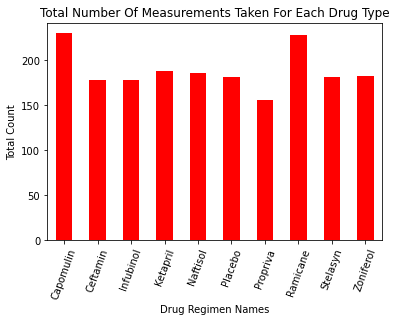

In [66]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
drug_count.plot(kind="bar", facecolor= "red",legend = False)
plt.xticks(rotation=70)
# Give chart some labels and a tile
plt.title("Total Number Of Measurements Taken For Each Drug Type")
plt.xlabel("Drug Regimen Names")
plt.ylabel("Total Count")
#plt.legend(loc="lower right")
plt.savefig("./Images/Drug Sample Count.png") #single dot takes to the same folder.
plt.show()

In [25]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_group = clean_mice_df.groupby("Sex")
count_gender = gender_group.count()
count_gender.head()["Mouse ID"]

Sex
Female    930
Male      958
Name: Mouse ID, dtype: int64

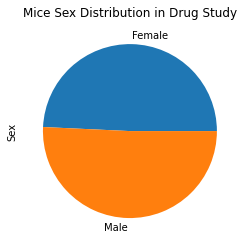

In [26]:
gender_pie = count_gender.plot(kind="pie", y='Mouse ID', title=("Mice Sex Distribution in Drug Study"), legend = False)
gender_pie.set_ylabel("Sex")

plt.show()
#plt.axis("equal")


#How can I make legend smaller or move it??
#plt.legend(loc="lower right")

In [27]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# The colors of each section of the pie chart

colors = ["orange", "lightskyblue"]
# Pie chart, where the slices will be ordered and plotted counter-clockwise:  start will be female
labels = 'Female', 'Male'
sizes = [930,958]
#explode = (0, 0.1)  # only "explode" the 2nd slice 

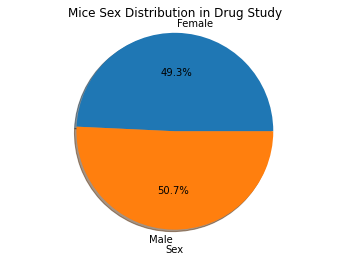

In [28]:


#plt.pie('Mouse ID',explode=None labels="Sex", colors=colors,
#       autopct="%1.1f%%", shadow=True, startangle=140)

#state angle is where the first segment starts

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=None, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=0)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title("Mice Sex Distribution in Drug Study")
plt.xlabel("Sex")

plt.show()

## Quartiles, Outliers and Boxplots

In [29]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
#clean_mice_df

#First pull out only 4 drug types.

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [30]:
drugs = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']

clean_mice_4drugs_df = pd.DataFrame(clean_mice_df[clean_mice_df['Drug Regimen'].isin(drugs)]) 
#clean_mice_4drugs_df

In [31]:
clean_mice_4drugs_df['HighTime'] = "No"
#clean_mice_4drugs_df

In [32]:
#clean_mice_4drugs45_df = pd.DataFrame(clean_mice_4drugs_df[clean_mice_4drugs_df['Timepoint'] == 35]) 
#clean_mice_4drugs45_df

In [33]:
#first_df = clean_mice_4drugs_df.groupby('Mouse ID')
#first_df.count()

In [34]:
#clean_mice_4drugs_df['HighTime'] = "No"
#clean_mice_4drugs_df

In [35]:
first_df = pd.DataFrame(clean_mice_4drugs_df[clean_mice_4drugs_df['Mouse ID'] == 'i177'])
first_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,ID Time,Duplicate,HighTime
175,i177,Ramicane,Male,10,18,0,45.000000,0,i1770,False,No
176,i177,Ramicane,Male,10,18,5,44.065398,0,i1775,False,No
177,i177,Ramicane,Male,10,18,10,41.020929,0,i17710,False,No
178,i177,Ramicane,Male,10,18,15,40.330935,0,i17715,False,No
179,i177,Ramicane,Male,10,18,20,35.345361,0,i17720,False,No
180,i177,Ramicane,Male,10,18,25,34.082180,1,i17725,False,No
181,i177,Ramicane,Male,10,18,30,34.711473,1,i17730,False,No
182,i177,Ramicane,Male,10,18,35,35.152166,1,i17735,False,No
183,i177,Ramicane,Male,10,18,40,35.557933,2,i17740,False,No
184,i177,Ramicane,Male,10,18,45,33.562402,3,i17745,False,No


In [36]:
#first_df.loc[first_df["Timepoint"]==45].index

In [37]:
mice_list = clean_mice_4drugs_df["Mouse ID"].unique()
#mice_list

In [38]:
for mice in mice_list:
    first_df = pd.DataFrame(clean_mice_4drugs_df[clean_mice_4drugs_df['Mouse ID'] == mice])
    column = first_df["Timepoint"]
    max_value = column.max()
    clean_mice_4drugs_df.at[first_df.loc[first_df["Timepoint"] == max_value].index,"HighTime"] = "High"
clean_mice_4drugs_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,ID Time,Duplicate,HighTime
0,k403,Ramicane,Male,21,16,0,45.000000,0,k4030,False,No
1,k403,Ramicane,Male,21,16,5,38.825898,0,k4035,False,No
2,k403,Ramicane,Male,21,16,10,35.014271,1,k40310,False,No
3,k403,Ramicane,Male,21,16,15,34.223992,1,k40315,False,No
4,k403,Ramicane,Male,21,16,20,32.997729,1,k40320,False,No
...,...,...,...,...,...,...,...,...,...,...,...
1868,z581,Infubinol,Female,24,25,25,54.316407,2,z58125,False,No
1869,z581,Infubinol,Female,24,25,30,56.286750,2,z58130,False,No
1870,z581,Infubinol,Female,24,25,35,58.628399,3,z58135,False,No
1871,z581,Infubinol,Female,24,25,40,60.053740,3,z58140,False,No


In [39]:
last_time_interval_mice_df = pd.DataFrame(clean_mice_4drugs_df[clean_mice_4drugs_df['HighTime'] == "High"])
last_time_interval_mice_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,ID Time,Duplicate,HighTime
9,k403,Ramicane,Male,21,16,45,22.050126,1,k40345,False,High
19,s185,Capomulin,Female,3,17,45,23.343598,1,s18545,False,High
29,x401,Capomulin,Female,16,15,45,28.484033,0,x40145,False,High
39,m601,Capomulin,Male,22,17,45,28.430964,1,m60145,False,High
49,g791,Ramicane,Male,11,16,45,29.128472,1,g79145,False,High
...,...,...,...,...,...,...,...,...,...,...,...
1797,x822,Ceftamin,Male,3,29,45,61.386660,3,x82245,False,High
1813,y163,Infubinol,Female,17,27,45,67.685569,3,y16345,False,High
1845,y769,Ceftamin,Female,6,27,45,68.594745,4,y76945,False,High
1855,y865,Ceftamin,Male,23,26,45,64.729837,3,y86545,False,High


In [40]:
#column = first_df["Timepoint"]
#max_value = column.max()
#max_value

#first_df.loc[first_df["Timepoint"]==45].index

#first_df.at[first_df.loc[first_df["Timepoint"]==45].index,"HighTime"] = "Works"
#first_df

In [41]:
# Put treatments into a list for for loop (and later for plot labels)
#drugs = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin'] at the top

# Create empty list to fill with tumor vol data (for plotting)

#df with only volume
tumor_vol_data = last_time_interval_mice_df['Tumor Volume (mm3)']
tumor_vol_data


#Tumor df with volume and drug type
tumor_vol_df = last_time_interval_mice_df[['Tumor Volume (mm3)','Drug Regimen']].copy()
tumor_vol_df

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset 

    # Determine outliers using upper and lower bounds
    

,Tumor Volume (mm3),Drug Regimen
9,22.050126,Ramicane
19,23.343598,Capomulin
29,28.484033,Capomulin
39,28.430964,Capomulin
49,29.128472,Ramicane
...,...,...
1797,61.386660,Ceftamin
1813,67.685569,Infubinol
1845,68.594745,Ceftamin
1855,64.729837,Ceftamin


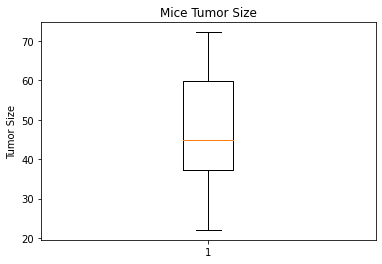

In [42]:
fig1, ax1 = plt.subplots()
ax1.set_title('Mice Tumor Size')
ax1.set_ylabel('Tumor Size')
ax1.boxplot(tumor_vol_data)
plt.show()

In [43]:
# If the data is in a dataframe, we use pandas to give quartile calculations
#Created a df to use here - tumor_vol_data only not sorted for Drug Regimen
#using ALL 4 drug regimens
quartiles = tumor_vol_data.quantile([.25,.5,.75])
lowerq = round(quartiles[0.25],2)
upperq = round(quartiles[0.75],2)
iqr = round(upperq-lowerq,2)

print(f"The lower quartile of tumor volume is: {lowerq}")
print(f"The upper quartile of tumore volume is: {upperq}")
print(f"The interquartile range of tumor volume is: {iqr}")
print(f"The the median of tumor volume is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of tumor volume is: 37.19
The upper quartile of tumore volume is: 59.93
The interquartile range of tumor volume is: 22.74
The the median of tumor volume is: 45.0 
Values below 3.0799999999999983 could be outliers.
Values above 94.03999999999999 could be outliers.


In [44]:
#tumor_vol_df["Capomulin"]
#tumor_vol_capomulin_df = last_time_interval_mice_df[['Tumor Volume (mm3)','Drug Regimen']].copy()
#capomulin_df=pd.DataFrame(clean_mice_df[clean_mice_df['Drug Regimen'] == 'Capomulin'])
tumor_vol_capomulin_df = pd.DataFrame(tumor_vol_df[tumor_vol_df['Drug Regimen'] == 'Capomulin'])
tumor_vol_capomulin_df = tumor_vol_capomulin_df["Tumor Volume (mm3)"]
#tumor_vol_capomulin_df

In [45]:
# If the data is in a dataframe, we use pandas to give quartile calculations
#Created a df to use here - tumor_vol_data only not sorted for Drug Regimen

#Capomulin
quartiles = tumor_vol_capomulin_df.quantile([.25,.5,.75])
lowerq = round(quartiles[0.25],2)
upperq = round(quartiles[0.75],2)
iqr = round(upperq-lowerq,2)

print(f"The lower quartile of tumor volume is: {lowerq}")
print(f"The upper quartile of tumore volume is: {upperq}")
print(f"The interquartile range of tumor volume is: {iqr}")
print(f"The the median of tumor volume is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of tumor volume is: 32.38
The upper quartile of tumore volume is: 40.16
The interquartile range of tumor volume is: 7.78
The the median of tumor volume is: 38.125164399999996 
Values below 20.71 could be outliers.
Values above 51.83 could be outliers.


In [46]:
tumor_vol_Ramicane_df = pd.DataFrame(tumor_vol_df[tumor_vol_df['Drug Regimen'] == 'Ramicane'])
tumor_vol_Ramicane_df = tumor_vol_Ramicane_df["Tumor Volume (mm3)"]
tumor_vol_Infubinol_df = pd.DataFrame(tumor_vol_df[tumor_vol_df['Drug Regimen'] == 'Infubinol'])
tumor_vol_Infubinol_df = tumor_vol_Infubinol_df["Tumor Volume (mm3)"]
tumor_vol_Ceftamin_df = pd.DataFrame(tumor_vol_df[tumor_vol_df['Drug Regimen'] == 'Ceftamin'])
tumor_vol_Ceftamin_df = tumor_vol_Ceftamin_df["Tumor Volume (mm3)"]

In [47]:
#Ramicane
quartiles = tumor_vol_Ramicane_df.quantile([.25,.5,.75])
lowerq = round(quartiles[0.25],2)
upperq = round(quartiles[0.75],2)
iqr = round(upperq-lowerq,2)

print(f"The lower quartile of tumor volume is: {lowerq}")
print(f"The upper quartile of tumore volume is: {upperq}")
print(f"The interquartile range of tumor volume is: {iqr}")
print(f"The the median of tumor volume is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of tumor volume is: 31.56
The upper quartile of tumore volume is: 40.66
The interquartile range of tumor volume is: 9.1
The the median of tumor volume is: 36.56165229 
Values below 17.91 could be outliers.
Values above 54.309999999999995 could be outliers.


In [48]:
#Infubinol
quartiles = tumor_vol_Infubinol_df.quantile([.25,.5,.75])
lowerq = round(quartiles[0.25],2)
upperq = round(quartiles[0.75],2)
iqr = round(upperq-lowerq,2)

print(f"The lower quartile of tumor volume is: {lowerq}")
print(f"The upper quartile of tumore volume is: {upperq}")
print(f"The interquartile range of tumor volume is: {iqr}")
print(f"The the median of tumor volume is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of tumor volume is: 54.05
The upper quartile of tumore volume is: 65.53
The interquartile range of tumor volume is: 11.48
The the median of tumor volume is: 60.16518046 
Values below 36.83 could be outliers.
Values above 82.75 could be outliers.


In [49]:
#Ceftamin
quartiles = tumor_vol_Ceftamin_df.quantile([.25,.5,.75])
lowerq = round(quartiles[0.25],2)
upperq = round(quartiles[0.75],2)
iqr = round(upperq-lowerq,2)

print(f"The lower quartile of tumor volume is: {lowerq}")
print(f"The upper quartile of tumore volume is: {upperq}")
print(f"The interquartile range of tumor volume is: {iqr}")
print(f"The the median of tumor volume is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of tumor volume is: 48.72
The upper quartile of tumore volume is: 64.3
The interquartile range of tumor volume is: 15.58
The the median of tumor volume is: 59.85195552 
Values below 25.349999999999998 could be outliers.
Values above 87.67 could be outliers.


In [50]:
tumor_vol_data_list = last_time_interval_mice_df['Tumor Volume (mm3)'].values
#tumor_vol_data_list

In [51]:
tumor_vol_data_list.sort()
#tumor_vol_data_list

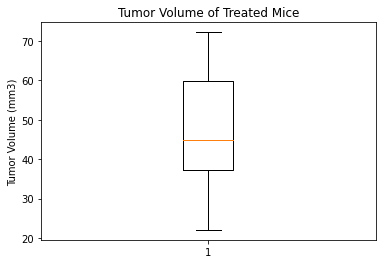

In [52]:
tumor_vol_data_list
# Example outlier plot of reaction times
fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volume of Treated Mice')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.boxplot(tumor_vol_data)
#ax1.boxplot(by ='Drug Regimen')
plt.show()

In [53]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

<AxesSubplot:title={'center':'Tumor Volume (mm3)'}, xlabel='[Drug Regimen]'>

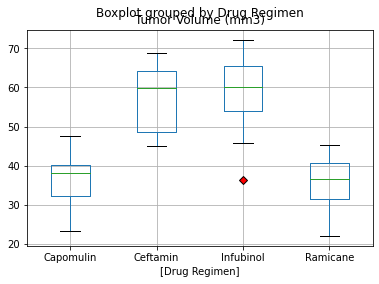

In [64]:


green_diamond = dict(markerfacecolor='r', marker='D')

#ax3.boxplot(data, flierprops=green_diamond)
tumor_vol_df.boxplot(by='Drug Regimen',flierprops=green_diamond)

#tumor_vol_df.boxplot(tumor_vol_data, flierprops=red_square)


#title('Volume of Tumor in Mice Treated with Drug Regimen')
#xlabel('Drug Regimen')
#ylabel('Volume mm3')

## Line and Scatter Plots

In [55]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_df=pd.DataFrame(clean_mice_df[clean_mice_df['Drug Regimen'] == 'Capomulin'])
capomulin_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,ID Time,Duplicate
10,s185,Capomulin,Female,3,17,0,45.000000,0,s1850,False
11,s185,Capomulin,Female,3,17,5,43.878496,0,s1855,False
12,s185,Capomulin,Female,3,17,10,37.614948,0,s18510,False
13,s185,Capomulin,Female,3,17,15,38.177232,0,s18515,False
14,s185,Capomulin,Female,3,17,20,36.866876,0,s18520,False
...,...,...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1,i55745,False
1452,r157,Capomulin,Male,22,25,0,45.000000,0,r1570,False
1453,r157,Capomulin,Male,22,25,5,45.597064,0,r1575,False
1454,r157,Capomulin,Male,22,25,10,46.059608,0,r15710,False


In [56]:
capomulin_df["Mouse ID"].unique()

array(['s185', 'x401', 'm601', 'f966', 'u364', 'y793', 'r554', 'm957',
       't565', 'i738', 'w914', 'g288', 'l897', 'b742', 'b128', 'j246',
       'j119', 'w150', 'v923', 'g316', 's710', 'l509', 'r944', 'i557',
       'r157'], dtype=object)

In [57]:
capomulin_mouse_df=pd.DataFrame(capomulin_df[capomulin_df['Mouse ID'] == 't565'])
capomulin_mouse_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,ID Time,Duplicate
155,t565,Capomulin,Female,20,17,0,45.000000,0,t5650,False
156,t565,Capomulin,Female,20,17,5,45.895647,0,t5655,False
157,t565,Capomulin,Female,20,17,10,46.749006,0,t56510,False
158,t565,Capomulin,Female,20,17,15,44.440949,0,t56515,False
159,t565,Capomulin,Female,20,17,20,39.070214,0,t56520,False
160,t565,Capomulin,Female,20,17,25,37.342210,0,t56525,False
161,t565,Capomulin,Female,20,17,30,32.868916,0,t56530,False
162,t565,Capomulin,Female,20,17,35,33.515671,0,t56535,False
163,t565,Capomulin,Female,20,17,40,33.949341,0,t56540,False
164,t565,Capomulin,Female,20,17,45,34.455298,0,t56545,False


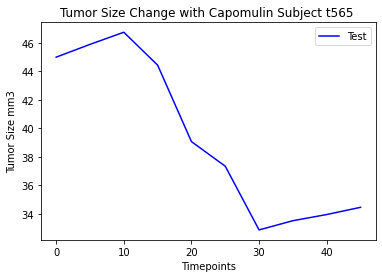

In [76]:
time = np.arange(30,50,5)

mouse_time = capomulin_mouse_df['Timepoint'].values
tumor_size = capomulin_mouse_df['Tumor Volume (mm3)'].values

mouse_interval= plt.plot(mouse_time, tumor_size, color="blue",label="Test")
plt.title("Tumor Size Change with Capomulin Subject t565 ")
plt.xlabel("Timepoints")
plt.ylabel("Tumor Size mm3")
plt.legend()
plt.show()

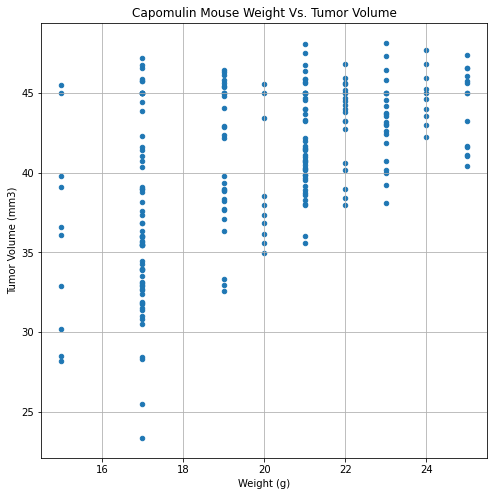

In [59]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_df.plot(kind="scatter", x="Weight (g)", y="Tumor Volume (mm3)", grid=True, figsize=(8,8),
              title="Capomulin Mouse Weight Vs. Tumor Volume")
plt.show()

## Correlation and Regression

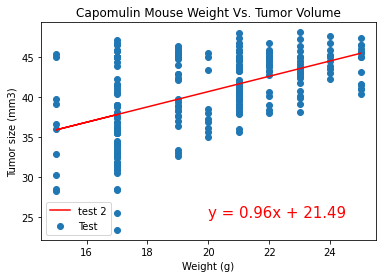

In [78]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
#Values for x and y (one way to pull)
x_values = capomulin_df['Weight (g)']
y_values = capomulin_df['Tumor Volume (mm3)']

#find the regression line 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
equation = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#another way to put in x and y values
plt.scatter(capomulin_df.iloc[:,4],capomulin_df.iloc[:,6], label = "Test")
#regression line
plt.plot(x_values,equation,"r-", label="test 2")
plt.annotate(line_eq,(20,25),fontsize=15,color="red")
plt.title('Capomulin Mouse Weight Vs. Tumor Volume')
plt.xlabel('Weight (g)')
plt.ylabel('Tumor size (mm3)')
plt.legend()
plt.show()